# Dask arrays

Let's explore Dask arrays!

In [15]:
import numpy as np
import dask.array as da

Let's create a random dask array, do some operation and visualize it:

In [16]:
x = da.random.random((2000, 2000), chunks=(500, 500))
x

dask.array<random_sample, shape=(2000, 2000), dtype=float64, chunksize=(500, 500), chunktype=numpy.ndarray>

In [17]:
x = da.random.random((8000, 8000))
x

dask.array<random_sample, shape=(8000, 8000), dtype=float64, chunksize=(4096, 4096), chunktype=numpy.ndarray>

In [18]:
y = x.mean()

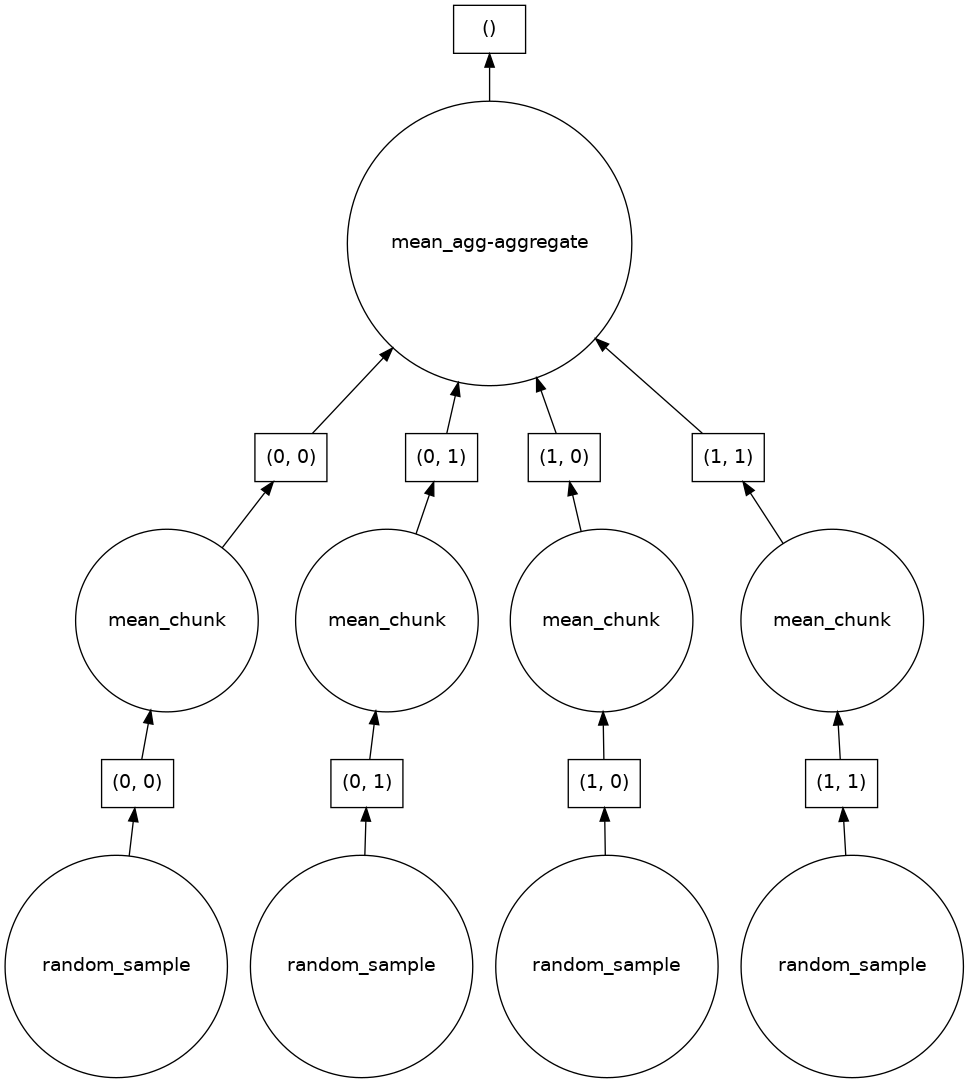

In [19]:
y.visualize()

Let's increase the size of the array and compute the operation.

In [7]:
%%time
N = 20000
x = da.random.random((N, N))
y = x.mean()
y.compute()

CPU times: user 6.48 s, sys: 1.5 s, total: 7.98 s
Wall time: 924 ms


0.500003051976596

Let's compare the results with NumPy:

In [8]:
%%time
N = 20000
rng = np.random.default_rng()
x = rng.random((N, N))
x.mean()

CPU times: user 2 s, sys: 820 ms, total: 2.82 s
Wall time: 2.82 s


0.49999516119880827

<mark>**Question**</mark>: Try the two cells above with `N = 200`. Which one is faster, the numpy version or the dask one?

***

Let's consider now the operation `x @ x`. <mark>**Question**</mark>: Could you explain the results of the timings?

In [9]:
%%time
N = 6000
x = rng.random((N, N))
y = x @ x

CPU times: user 12.7 s, sys: 934 ms, total: 13.6 s
Wall time: 1.43 s


In [10]:
N = 6000
x = da.random.random((N, N))
y = x @ x

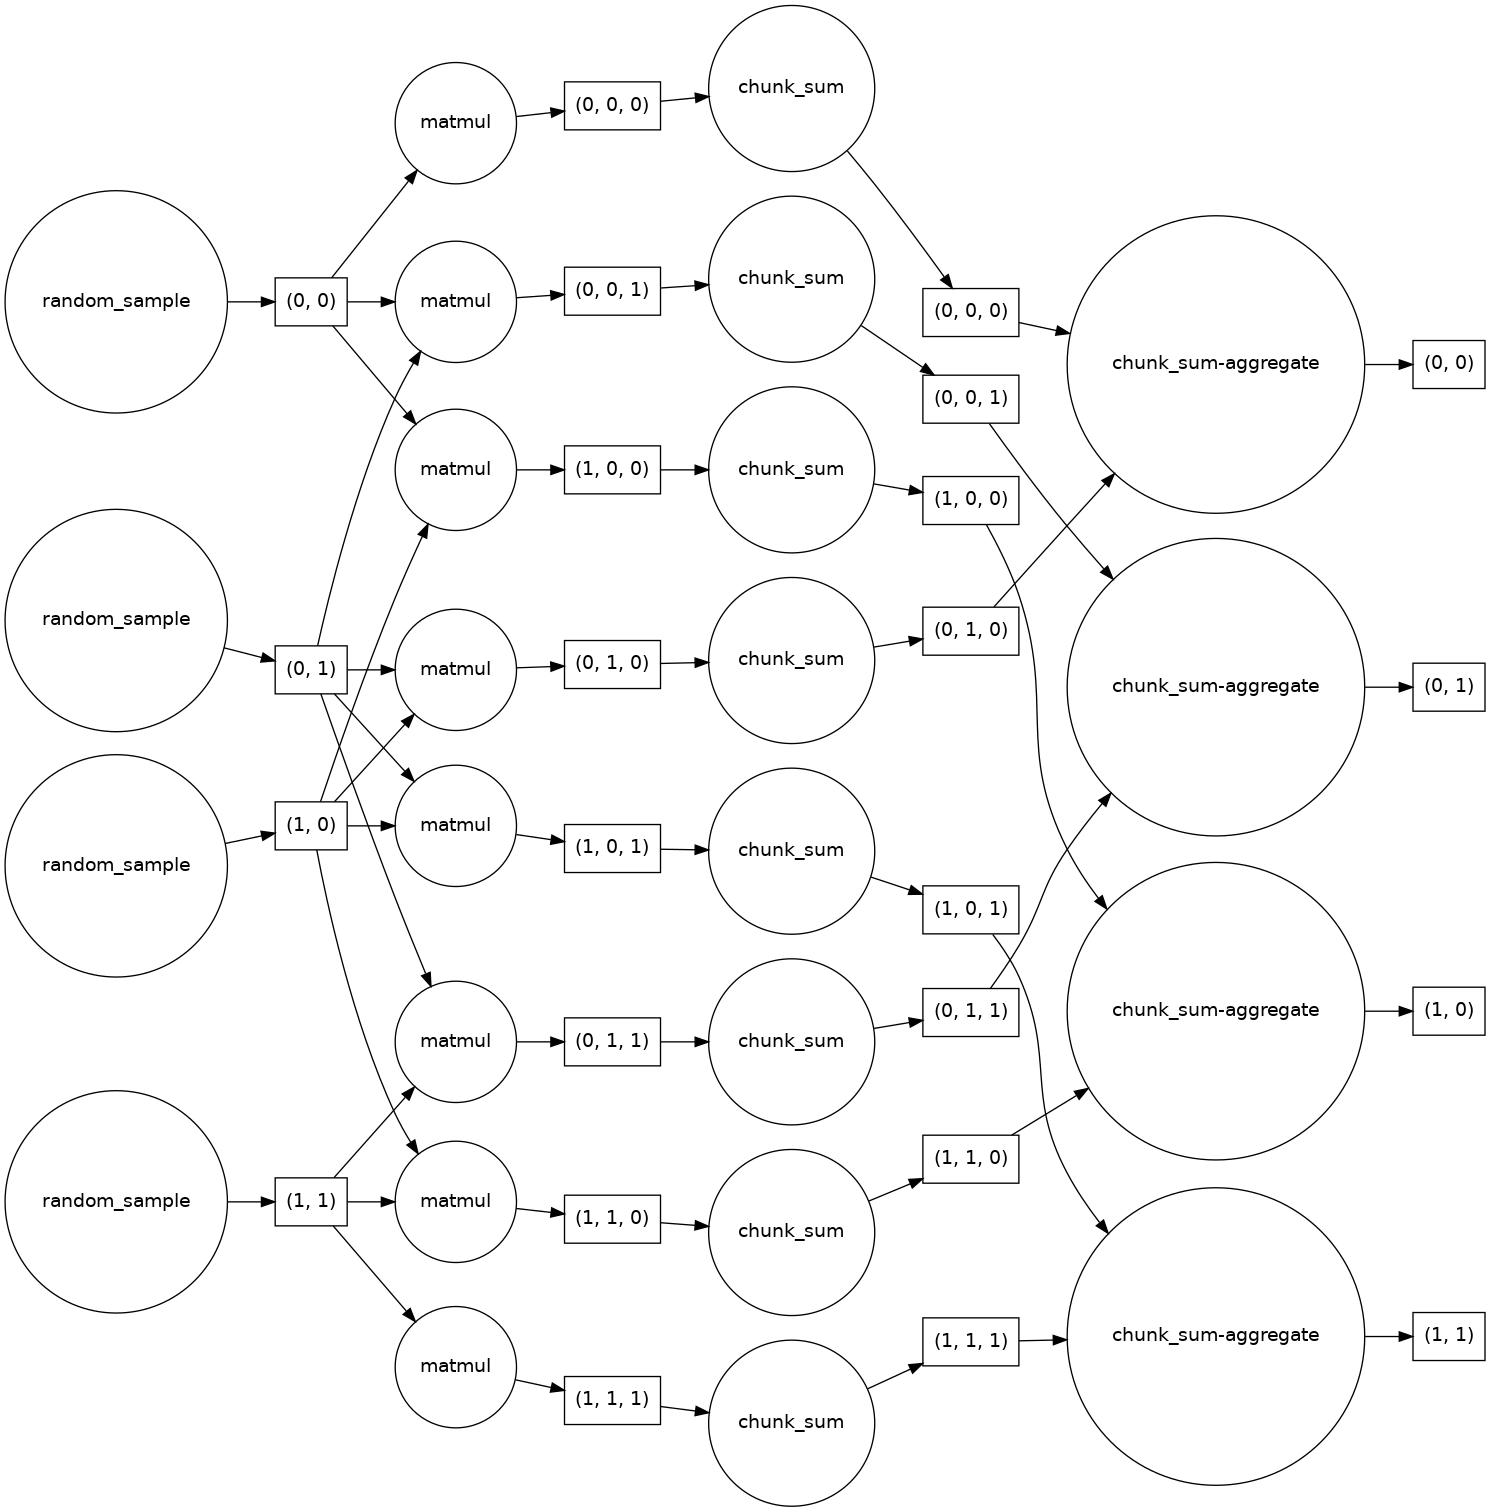

In [11]:
y.visualize(rankdir='LR')

In [12]:
%%time
y.compute().shape

CPU times: user 17.1 s, sys: 3.62 s, total: 20.8 s
Wall time: 1.84 s


(6000, 6000)